In [1]:
### Importing Libraries

import gc
import os
from pathlib import Path
import random
import sys
    
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import scipy as sp 
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import ticker 

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_white"


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import requests

for filename in ['time_series_covid19_confirmed_global.csv',
                 'time_series_covid19_deaths_global.csv',
                 'time_series_covid19_recovered_global.csv',
                 'time_series_covid19_confirmed_US.csv',
                 'time_series_covid19_deaths_US.csv']:
    print(f'Downloading {filename}')
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}'
    myfile = requests.get(url)
    open(filename, 'wb').write(myfile.content)

287043

201170

255116

2926673

2258874

In [3]:
#pip install plotly

In [4]:
confirmed_global_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
death_global_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_global_df = pd.read_csv('time_series_covid19_recovered_global.csv')
confirmed_us_df = pd.read_csv('time_series_covid19_confirmed_US.csv')
death_us_df = pd.read_csv('time_series_covid19_deaths_US.csv')

confirmed_global_df=confirmed_global_df.drop(["Province/State","Lat","Long"],1).iloc[:,[0,-1]]
death_global_df=death_global_df.drop(["Province/State","Lat","Long"],1).iloc[:,[0,-1]]
recovered_global_df=recovered_global_df.drop(["Province/State","Lat","Long"],1).iloc[:,[0,-1]]
confirmed_us_df=confirmed_us_df.drop(["UID","iso2","iso3","code3","FIPS",'Admin2',"Country_Region","Lat","Long_","Combined_Key"],1).iloc[:,[0,-1]]
death_us_df=death_us_df.drop(["UID","iso2","iso3","code3","FIPS",'Admin2',"Country_Region","Lat","Long_"],1).iloc[:,[0,-1]]

## India Data
confirmed_india_df=confirmed_global_df[confirmed_global_df['Country/Region']=="India"].iloc[:,[0,-1]]

In [5]:
confirmed_melt_global_df=confirmed_global_df.melt(id_vars=["Country/Region"], value_vars=confirmed_global_df.columns[1:], var_name="Date", value_name="Confirmed_Cases")
death_melt_global_df=death_global_df.melt(id_vars=["Country/Region"], var_name="Date", value_name="Death_Cases")
recovered_melt_global_df=recovered_global_df.melt(id_vars=["Country/Region"], var_name="Date", value_name="Recovered_Cases")

In [6]:
confirmed_melt_global_df["Date"]=pd.to_datetime(confirmed_melt_global_df["Date"])
death_melt_global_df["Date"]=pd.to_datetime(death_melt_global_df["Date"])
recovered_melt_global_df["Date"]=pd.to_datetime(recovered_melt_global_df["Date"])

In [7]:
confirmed_melt_global_df=confirmed_melt_global_df.groupby('Country/Region').sum()
death_melt_global_df=death_melt_global_df.groupby('Country/Region').sum()
recovered_melt_global_df=recovered_melt_global_df.groupby('Country/Region').sum()


In [8]:
final_df=confirmed_melt_global_df.merge(death_melt_global_df, how="left", on="Country/Region")
final_df=final_df.merge(recovered_melt_global_df,how="left", on="Country/Region")

In [9]:
final_df['Active_Cases']=final_df['Confirmed_Cases']-final_df['Death_Cases']-final_df['Recovered_Cases']
final_df["Mortality_Rate"]=round(final_df['Death_Cases']/final_df['Confirmed_Cases'],4)*100

In [10]:
final_df.head()

,Confirmed_Cases,Death_Cases,Recovered_Cases,Active_Cases,Mortality_Rate
Country/Region,,,,,
Afghanistan,39341,1462,32852,5027,3.72
Albania,14266,396,8675,5195,2.78
Algeria,52136,1760,36578,13798,3.38
Andorra,2110,53,1540,517,2.51
Angola,5402,195,2577,2630,3.61


In [11]:
#final_df[final_df['Country/Region']=="India"]

In [12]:
final_df.head(2)

,Confirmed_Cases,Death_Cases,Recovered_Cases,Active_Cases,Mortality_Rate
Country/Region,,,,,
Afghanistan,39341,1462,32852,5027,3.72
Albania,14266,396,8675,5195,2.78


<BarContainer object of 5 artists>

Text(0.5, 0, 'Confirmed Cases')

Text(0.5, 1.0, 'Top 10 Countries (Confirmed Cases)')

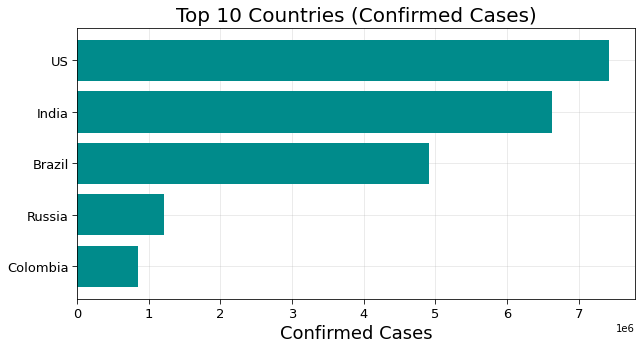

In [13]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(final_df.sort_values('Confirmed_Cases')["Confirmed_Cases"].index[-5:],final_df.sort_values('Confirmed_Cases')["Confirmed_Cases"].values[-5:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
#plt.xticks(rotation=90)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')
#.savefig(out+'Top 10 Countries (Deaths Cases).png')

<BarContainer object of 5 artists>

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 0, 'Death_Cases')

Text(0.5, 1.0, 'Top 10 Countries (Death_Cases)')

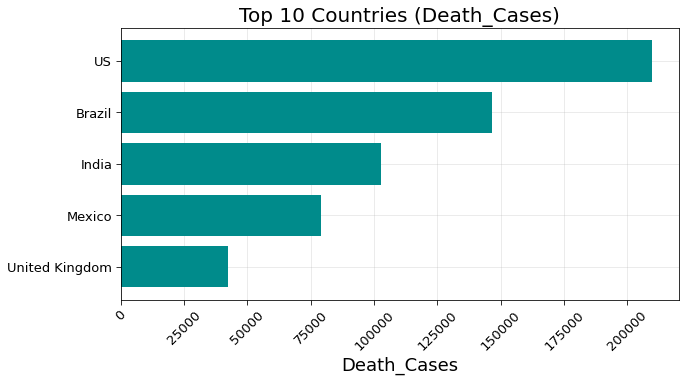

In [14]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(final_df.sort_values('Death_Cases')["Death_Cases"].index[-5:],final_df.sort_values('Death_Cases')["Death_Cases"].values[-5:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xticks(rotation=45)
plt.xlabel("Death_Cases",fontsize=18)
plt.title("Top 10 Countries (Death_Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

<BarContainer object of 5 artists>

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, 'Recovered_Cases')

Text(0.5, 1.0, 'Top 10 Countries (Recovered_Cases)')

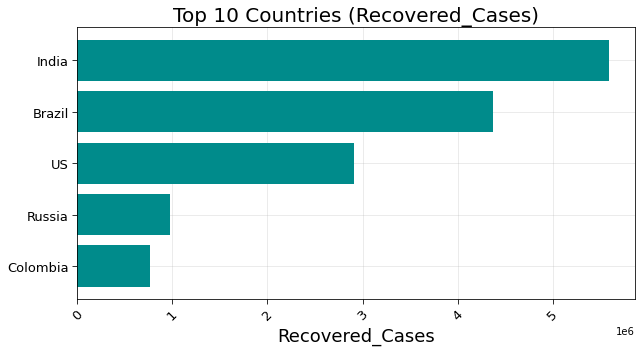

In [15]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(final_df.sort_values('Recovered_Cases')["Recovered_Cases"].index[-5:],final_df.sort_values('Recovered_Cases')["Recovered_Cases"].values[-5:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xticks(rotation=45)
plt.xlabel("Recovered_Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered_Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

<BarContainer object of 5 artists>

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, 'Active_Cases')

Text(0.5, 1.0, 'Top 10 Countries (Active_Cases)')

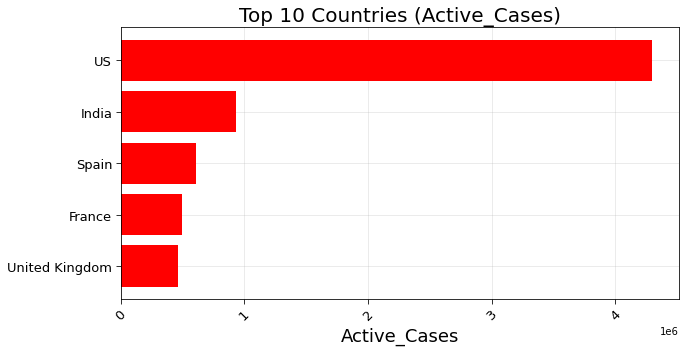

In [16]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(final_df.sort_values('Active_Cases')["Active_Cases"].index[-5:],final_df.sort_values('Active_Cases')["Active_Cases"].values[-5:],color="Red")
plt.tick_params(size=5,labelsize = 13)
plt.xticks(rotation=45)
plt.xlabel("Active_Cases",fontsize=18)
plt.title("Top 10 Countries (Active_Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

<BarContainer object of 5 artists>

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

Text(0.5, 0, 'Mortality_Rate')

Text(0.5, 1.0, 'Top 10 Countries (Mortality_Rate)')

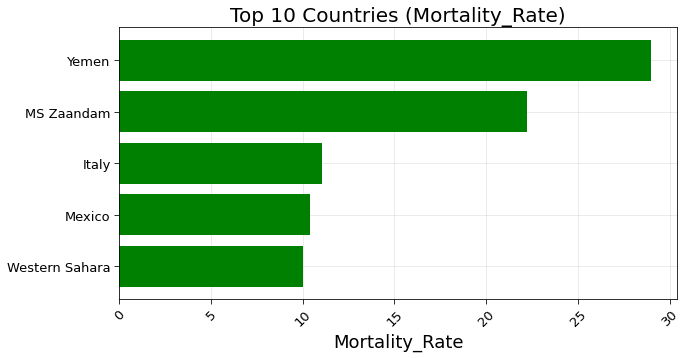

In [17]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(final_df.sort_values('Mortality_Rate')["Mortality_Rate"].index[-5:],final_df.sort_values('Mortality_Rate')["Mortality_Rate"].values[-5:],color="Green")
plt.tick_params(size=5,labelsize = 13)
plt.xticks(rotation=45)
plt.xlabel("Mortality_Rate",fontsize=18)
plt.title("Top 10 Countries (Mortality_Rate)",fontsize=20)
plt.grid(alpha=0.3,which='both')

In [18]:
final_df["% Active_Cases"]=(final_df["Active_Cases"])*100/final_df["Confirmed_Cases"]
final_df["% Active_Cases"]=round(final_df["% Active_Cases"],4).replace(np.nan, 0)

In [19]:
final_df["%Recovery_Rate"]=(final_df['Recovered_Cases']*100)/final_df['Confirmed_Cases']
final_df['%Recovery_Rate']=round(final_df['%Recovery_Rate'],4).replace(np.nan, 0)

In [20]:
#final_df.sort_values("%Recovery_Rate", ascending=False)

### India

In [21]:
import requests

for filename in ['time_series_covid19_confirmed_global.csv',
                 'time_series_covid19_deaths_global.csv',
                 'time_series_covid19_recovered_global.csv',
                 'time_series_covid19_confirmed_US.csv',
                 'time_series_covid19_deaths_US.csv']:
    print(f'Downloading {filename}')
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}'
    myfile = requests.get(url)
    open(filename, 'wb').write(myfile.content)

287043

201170

255116

2926673

2258874

In [22]:
confirmed_global_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
death_global_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_global_df = pd.read_csv('time_series_covid19_recovered_global.csv')


In [23]:
confirmed_india_df=confirmed_global_df[confirmed_global_df['Country/Region']=="India"].drop(["Province/State","Lat", "Long"], 1)#.rename(columns={"Country/Region":"County"}, inplace=True)
confirmed_india_df.rename(columns={"Country/Region":"Country"}, inplace=True)

In [24]:
death_india_df=death_global_df[death_global_df['Country/Region']=="India"].drop(["Province/State","Lat", "Long"],1) 
death_india_df.rename(columns={"Country/Region":"Country"}, inplace=True)                                                                                

In [25]:
recovered_india_df=recovered_global_df[recovered_global_df['Country/Region']=="India"].drop(["Province/State","Lat", "Long"], 1)#.rename(columns={"Country/Region":"County"}, inplace=True)
recovered_india_df.rename(columns={"Country/Region":"Country"}, inplace=True) 

In [26]:
confirmed_melt_india_df=confirmed_india_df.melt(id_vars=['Country'], var_name="Date",value_name="Confirmed_Cases" ).drop("Country", 1)
death_melt_india_df=death_india_df.melt(id_vars=['Country'], var_name="Date",value_name="Death_Cases" ).drop("Country", 1)
recovered_melt_india_df=recovered_india_df.melt(id_vars=['Country'], var_name="Date",value_name="Recovered_Cases" ).drop("Country", 1)

In [27]:
final_india_df=confirmed_melt_india_df.merge(death_melt_india_df, how="left", on="Date")
final_india_df=final_india_df.merge(recovered_melt_india_df, how="left", on="Date")

In [28]:
final_india_df['Active_Cases']=final_india_df['Confirmed_Cases']-final_india_df['Death_Cases']-final_india_df['Recovered_Cases']
#final_india_df["Mortality_Rate"]=round(final_india_df['Death_Cases']/final_india_df['Confirmed_Cases'],2)*100

In [29]:
# 'ggplot2', 'seaborn', 'simple_white', 'plotly',
#          'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
#          'ygridoff', 'gridon', 'none'

In [65]:
pio.templates.default = "xgridoff"
fig = px.line(final_india_df, x="Date", y=["Confirmed_Cases","Death_Cases","Recovered_Cases","Active_Cases"], 
               title="India  Confirmed/Recovered/Death Cases Over Time")
fig.show()

### Recovery Rate 


In [31]:
final_india_df["Recovery_Rate"]=(final_india_df['Recovered_Cases']*100)/final_india_df['Confirmed_Cases']
final_india_df["Recovery_Rate"]=round(final_india_df["Recovery_Rate"],4).replace(np.nan, 0)

### Mortality Rate

In [32]:
final_india_df["Mortality_Rate"]=(round(final_india_df['Death_Cases']/final_india_df['Confirmed_Cases'],4)*100).replace(np.nan, 0)

In [33]:
final_india_df

,Date,Confirmed_Cases,Death_Cases,Recovered_Cases,Active_Cases,Recovery_Rate,Mortality_Rate
0,1/22/20,0,0,0,0,0.0000,0.00
1,1/23/20,0,0,0,0,0.0000,0.00
2,1/24/20,0,0,0,0,0.0000,0.00
3,1/25/20,0,0,0,0,0.0000,0.00
4,1/26/20,0,0,0,0,0.0000,0.00
...,...,...,...,...,...,...,...
252,9/30/20,6312584,98678,5273201,940705,83.5347,1.56
253,10/1/20,6394068,99773,5352078,942217,83.7038,1.56
254,10/2/20,6473544,100842,5427706,944996,83.8444,1.56
255,10/3/20,6549373,101782,5509966,937625,84.1297,1.55


In [34]:
pio.templates.default = "xgridoff"
fig = px.line(final_india_df, x="Date", y=["Recovery_Rate","Mortality_Rate"], 
               title="India's Recovery Rate & Mortality Rate")
fig.show()

In [35]:
pio.templates.default = "xgridoff"
fig = px.line(final_india_df, x="Date", y="Mortality_Rate"
              , title=" Mortality Rate in India % ")
fig.show()

In [36]:
### New Cases

final_india_df["New_Cases"]=final_india_df['Confirmed_Cases']-final_india_df['Confirmed_Cases'].shift(1)
final_india_df.tail()

,Date,Confirmed_Cases,Death_Cases,Recovered_Cases,Active_Cases,Recovery_Rate,Mortality_Rate,New_Cases
252,9/30/20,6312584,98678,5273201,940705,83.5347,1.56,86821.0
253,10/1/20,6394068,99773,5352078,942217,83.7038,1.56,81484.0
254,10/2/20,6473544,100842,5427706,944996,83.8444,1.56,79476.0
255,10/3/20,6549373,101782,5509966,937625,84.1297,1.55,75829.0
256,10/4/20,6623815,102685,5586703,934427,84.3427,1.55,74442.0


In [37]:
fig = px.line(final_india_df, x="Date", y="New_Cases", 
               title="Daily New cases in India")
fig.show()

### % Active Cases in India 

In [38]:
final_india_df["% Active_Cases"]=(final_india_df["Active_Cases"])*100/final_india_df["Confirmed_Cases"]
final_india_df["% Active_Cases"]=round(final_india_df["% Active_Cases"],4).replace(np.nan, 0)

In [39]:
final_india_df.tail()

,Date,Confirmed_Cases,Death_Cases,Recovered_Cases,Active_Cases,Recovery_Rate,Mortality_Rate,New_Cases,% Active_Cases
252,9/30/20,6312584,98678,5273201,940705,83.5347,1.56,86821.0,14.9021
253,10/1/20,6394068,99773,5352078,942217,83.7038,1.56,81484.0,14.7358
254,10/2/20,6473544,100842,5427706,944996,83.8444,1.56,79476.0,14.5978
255,10/3/20,6549373,101782,5509966,937625,84.1297,1.55,75829.0,14.3163
256,10/4/20,6623815,102685,5586703,934427,84.3427,1.55,74442.0,14.1071


In [40]:
fig = px.line(final_india_df, x="Date", y=["Recovery_Rate","% Active_Cases"], 
               title="Recovery Rate vs Active Cases", range_x=["3/6/20","8/11/20"])
fig.show()

In [41]:
fig = px.bar(final_india_df, x="Date", y=["% Active_Cases"], 
               title="Active Cases in India", range_x=["3/6/20","8/11/20"])
fig.show()

In [42]:
final_df=final_df.reset_index()

In [43]:
final_df=final_df.sort_values("Confirmed_Cases", ascending=False)
top_5_Confirmed_Cases=final_df[:10]

In [66]:
fig = px.bar(top_5_Confirmed_Cases, x="Country/Region", y=["Confirmed_Cases","Recovered_Cases", "Death_Cases"], 
               title="Top 10 Contries of Confirmed/Recoverd/Death Covid-19 cases across world")

#fig.update_traces(texttemplate='%{text:.1s}', textposition='inside')
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

In [45]:
final_df.head()

,Country/Region,Confirmed_Cases,Death_Cases,Recovered_Cases,Active_Cases,Mortality_Rate,% Active_Cases,%Recovery_Rate
174,US,7417845,209721,2911699,4296425,2.83,57.9201,39.2526
79,India,6623815,102685,5586703,934427,1.55,14.1071,84.3427
23,Brazil,4915289,146352,4375354,393583,2.98,8.0073,89.0152
140,Russia,1209039,21260,975488,212291,1.76,17.5587,80.6829
37,Colombia,855052,26712,761674,66666,3.12,7.7967,89.0793


### Countries Contribution of Covid-19 Cases 

In [46]:
final_df.head()

,Country/Region,Confirmed_Cases,Death_Cases,Recovered_Cases,Active_Cases,Mortality_Rate,% Active_Cases,%Recovery_Rate
174,US,7417845,209721,2911699,4296425,2.83,57.9201,39.2526
79,India,6623815,102685,5586703,934427,1.55,14.1071,84.3427
23,Brazil,4915289,146352,4375354,393583,2.98,8.0073,89.0152
140,Russia,1209039,21260,975488,212291,1.76,17.5587,80.6829
37,Colombia,855052,26712,761674,66666,3.12,7.7967,89.0793


In [47]:
final_df["% Confirmed_Cases"]= (final_df["Confirmed_Cases"])*100/sum(final_df['Confirmed_Cases'])

In [48]:
final_df=final_df.sort_values("% Confirmed_Cases", ascending=False)
Countries_Contribution=final_df[:10]

In [49]:
fig = px.bar(Countries_Contribution, x="Country/Region", y="% Confirmed_Cases", 
               title="Top 10 Contries % Confirmed Covid-19 cases across world", text="% Confirmed_Cases")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
#fig.show()

In [50]:
import requests

for filename in ['time_series_covid19_confirmed_global.csv',
                 'time_series_covid19_deaths_global.csv',
                 'time_series_covid19_recovered_global.csv',
                 'time_series_covid19_confirmed_US.csv',
                 'time_series_covid19_deaths_US.csv']:
    #print(f'Downloading {filename}')
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}'
    myfile = requests.get(url)
    open(filename, 'wb').write(myfile.content)

287043

201170

255116

2926673

2258874

In [51]:
confirmed_global_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
death_global_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_global_df = pd.read_csv('time_series_covid19_recovered_global.csv')
confirmed_us_df = pd.read_csv('time_series_covid19_confirmed_US.csv')
death_us_df = pd.read_csv('time_series_covid19_deaths_US.csv')

In [52]:
confirmed_global_df=confirmed_global_df.drop(["Province/State","Lat","Long"],1)

In [53]:
confirmed_global_df=confirmed_global_df.groupby("Country/Region").sum().reset_index()

In [54]:
confirmed_melt_global_df=confirmed_global_df.melt(id_vars=["Country/Region"], var_name="Date",value_name="Confirmed_Cases")


In [55]:
confirmed_melt_global_df['Date']=pd.to_datetime(confirmed_melt_global_df['Date'])

In [56]:
confirmed_melt_global_df.head()

,Country/Region,Date,Confirmed_Cases
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [57]:
confirmed_melt_I_df=confirmed_melt_global_df[confirmed_melt_global_df["Country/Region"]=='India'].set_index("Country/Region")
confirmed_melt_B_df=confirmed_melt_global_df[confirmed_melt_global_df["Country/Region"]=='Brazil'].set_index("Country/Region")
confirmed_melt_U_df=confirmed_melt_global_df[confirmed_melt_global_df["Country/Region"]=='US'].set_index("Country/Region")

In [58]:
confirmed_confirmed_IBU_df=confirmed_melt_I_df.merge(confirmed_melt_B_df, how='left', on="Date")
confirmed_confirmed_IBU_df=confirmed_confirmed_IBU_df.merge(confirmed_melt_U_df, how='left', on="Date")
confirmed_confirmed_IBU_df=confirmed_confirmed_IBU_df.rename(columns={'Confirmed_Cases_x':"India",'Confirmed_Cases_y':"Brazil","Confirmed_Cases":"USA"})

In [59]:

confirmed_confirmed_IBU_df

,Date,India,Brazil,USA
0,2020-01-22,0,0,1
1,2020-01-23,0,0,1
2,2020-01-24,0,0,2
3,2020-01-25,0,0,2
4,2020-01-26,0,0,5
...,...,...,...,...
252,2020-09-30,6312584,4810935,7233042
253,2020-10-01,6394068,4847092,7277791
254,2020-10-02,6473544,4847092,7332297
255,2020-10-03,6549373,4906833,7382341


In [60]:
fig = px.line(confirmed_confirmed_IBU_df, x="Date", y=["India","Brazil","USA"], 
               title="Top 3 countries Confirmed Cases")
fig.show()

In [61]:
confirmed_melt_global_df.set_index("Country/Region")

,Date,Confirmed_Cases
Country/Region,,
Afghanistan,2020-01-22,0
Albania,2020-01-22,0
Algeria,2020-01-22,0
Andorra,2020-01-22,0
Angola,2020-01-22,0
...,...,...
West Bank and Gaza,2020-10-04,41498
Western Sahara,2020-10-04,10
Yemen,2020-10-04,2041


### Prediction

In [ ]:
final_india_df.tail()

In [ ]:
final_india_df.info()

In [ ]:
final_india_df['Date']=pd.to_datetime(final_india_df['Date'])

In [ ]:
final_india_df['Date'].min()
final_india_df['Date'].max()

In [ ]:
Confirmed_Cases_Pred=final_india_df.loc[:,["Date", "Confirmed_Cases"]]

In [ ]:
Confirmed_Cases_Pred.tail()

In [ ]:
Confirmed_Cases_Pred.shape

In [ ]:
Confirmed_Cases_Pred.Date.nunique()

In [ ]:
a=0.1
b=a+a+a
if b==0.3:
    print("True")
else:
    print("False")    